## Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/sales_data_sample.csv', encoding = 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.shape

(2823, 25)

## Data Cleaning

In [ ]:
#remove columns
data=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'MONTH_ID']
df.drop(data,axis=1,inplace=True)

In [ ]:
# Regrouping product code.
df['PRODUCTINITIAL'] = df['PRODUCTCODE'].str[:3]
df.drop('PRODUCTCODE',axis=1,inplace=True)

In [ ]:
df2 = df
df2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


## Exploratory Data Analysis

In [ ]:
df2.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

In [ ]:
#checking unique values
df2.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
CUSTOMERNAME         92
COUNTRY              19
DEALSIZE              3
PRODUCTINITIAL        8
dtype: int64

In [ ]:
df2['CUSTOMERNAME'].nunique()

92

In [ ]:
# checking unique years
df2['YEAR_ID'].unique()

array([2003, 2004, 2005])

We have data on 92 unique customers over 3 years (2003-2005)

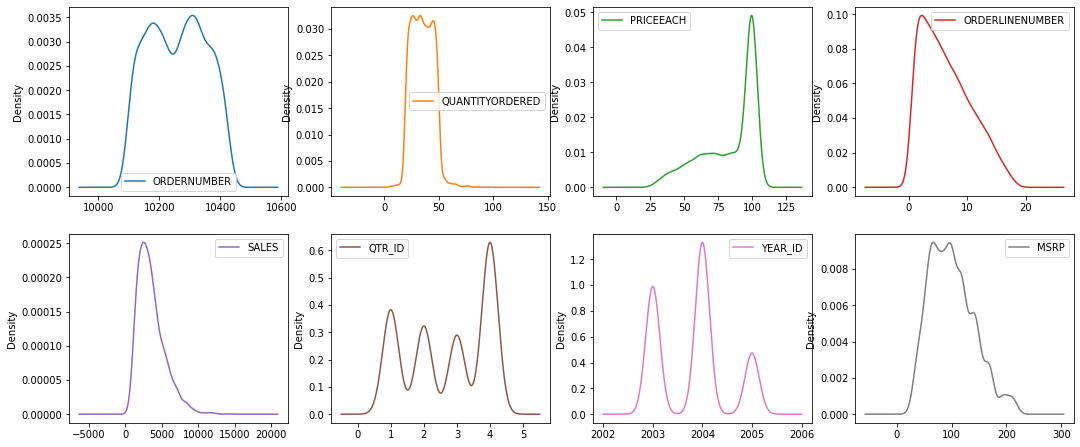

In [ ]:
plt.rcParams['figure.figsize'] = [18, 16]
df2.plot(kind="density", subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

In [ ]:
df2['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [ ]:
df2.groupby(['YEAR_ID'])['SALES'].sum()

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

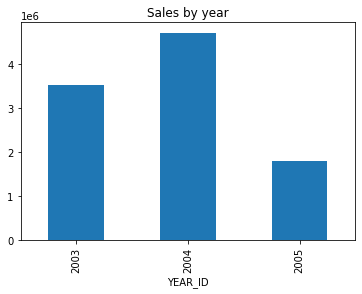

In [ ]:
df2.groupby(['YEAR_ID'])['SALES'].sum().plot(kind='bar', figsize=(6,4), title='Sales by year')

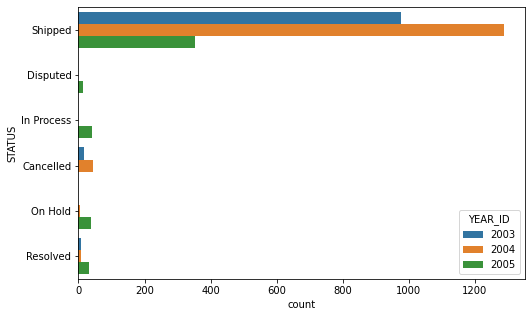

In [ ]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(y='STATUS',data=df2,hue='YEAR_ID', )

In [ ]:
#Quarterly Comparison
sales = df2.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum()})
sales

SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68
        2        766260.73
        3       1109396.27
        4       2014774.92
2005    1       1071992.36
        2        719494.35

## RFM Analysis

For RFM analysis, we need only 4 columns

In [ ]:
col =['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM = df2[col]
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [ ]:
RFM.shape

(2823, 4)

In [ ]:
RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
RFM['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [ ]:
RFM

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27
...,...,...,...,...
2818,Euro Shopping Channel,10350,2004-12-02,2244.40
2819,"Oulu Toy Supplies, Inc.",10373,2005-01-31,3978.51
2820,Euro Shopping Channel,10386,2005-03-01,5417.57
2821,Alpha Cognac,10397,2005-03-28,2116.16


In [ ]:
now = dt.datetime(2005,5,31)

**RFM Table Formation**

In [ ]:
rfm_df = RFM.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days}) 

In [ ]:
rfm_df['Frequency'] = RFM.groupby(by=['CUSTOMERNAME'])['ORDERNUMBER'].count()

In [ ]:
rfm_df['MonetaryValue'] = RFM.groupby(by='CUSTOMERNAME').agg({'SALES': 'sum'})

In [ ]:
rfm_df.head()

,ORDERDATE,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


In [ ]:
rfm_df.rename(columns={'ORDERDATE': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


## Model: RFM scoring + K-Means clustering

In [ ]:
r = pd.qcut(rfm_df.Recency, 4, labels = list(range(0,4)))

In [ ]:
f = pd.qcut(rfm_df.Frequency, 4, labels = list(range(0,4)))

In [ ]:
m = pd.qcut(rfm_df.MonetaryValue, 4, labels = list(range(0,4)))

In [ ]:
rfm_df_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
rfm_df_cutted

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",2,3,3
Alpha Cognac,0,1,1
Amica Models & Co.,3,1,2
"Anna's Decorations, Ltd",1,3,3
Atelier graphique,2,0,0
...,...,...,...
"Vida Sport, Ltd",3,2,2
Vitachrome Inc.,2,1,2
"Volvo Model Replicas, Co",2,0,1


In [ ]:
rfm_df_raw = rfm_df_cutted.values

In [ ]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_df_raw)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])

In [ ]:
groups

,number_of_group,inertia
0,1,344.304348
1,2,160.909613
2,3,107.023375
3,4,76.643737
4,5,60.647687
5,6,49.523810
6,7,41.563492
7,8,32.438695
8,9,28.781564
9,10,25.533331


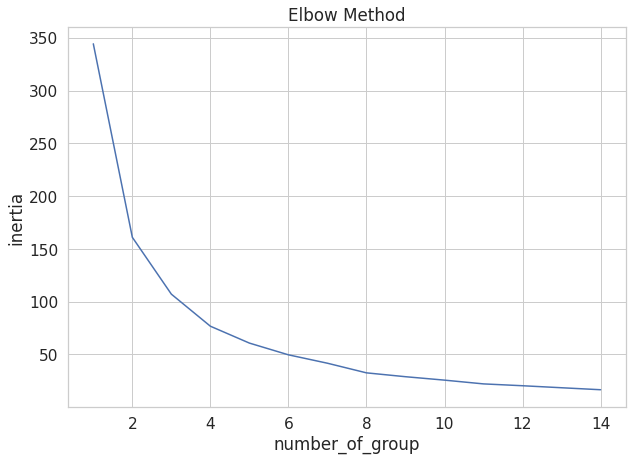

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

Based on the Elbow plot, we could choose 4

In [ ]:
def plots_model():    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for x in rfm_df.groups.unique():        
        xs = rfm_df[rfm_df.groups == x]['Recency']
        zs = rfm_df[rfm_df.groups == x]['Frequency']
        ys = rfm_df[rfm_df.groups == x]['MonetaryValue']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label = x)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [ ]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_df_raw)
rfm_df['groups'] = groups


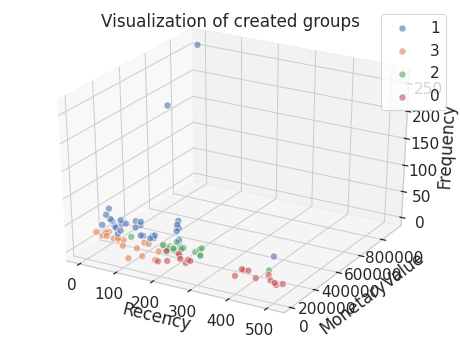

In [ ]:
plots_model()

In [ ]:
print((rfm_df.groups.value_counts(normalize = True, sort = True) * 100).to_string())

1    34.782609
2    25.000000
0    20.652174
3    19.565217


In [ ]:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,1.434783


In [ ]:
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,343.578947,15.157895,53855.717895
1,105.156250,50.187500,179045.850625
2,226.869565,25.304348,90911.423913
3,89.833333,19.277778,66052.235556


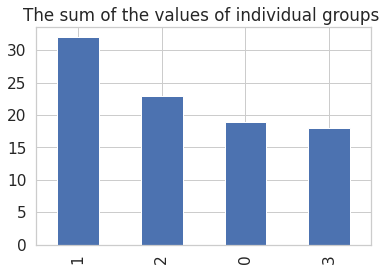

In [ ]:
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups ')

In [ ]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
CUSTOMERNAME,,,,
"AV Stores, Co.",195,51,157807.81,1
Alpha Cognac,64,20,70488.44,3
Amica Models & Co.,264,26,94117.26,2
"Anna's Decorations, Ltd",83,46,153996.13,1
Atelier graphique,187,7,24179.96,0


In [ ]:
#function to assigned segment name to each value
def name(row):
    if row == 0:
        return 'departing'
    elif row == 1:
        return 'active'
    elif row == 2:
        return 'inactive'
    else:
        return 'new'

In [ ]:
# adding column SegmentName to DataFrame
rfm_df['SegmentName'] = rfm_df['groups'].apply(name)

In [ ]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups,SegmentName
CUSTOMERNAME,,,,,
"AV Stores, Co.",195,51,157807.81,1,active
Alpha Cognac,64,20,70488.44,3,new
Amica Models & Co.,264,26,94117.26,2,inactive
"Anna's Decorations, Ltd",83,46,153996.13,1,active
Atelier graphique,187,7,24179.96,0,departing


**Description of the results**

Interpretation of the resulting groups:

We chose segmentation for four groups. We may interpret them as the following customer segments:

Group 0: Customers who were shopping for a long time, buy moderately often and they shop for high amounts.
Group 1: Customers who have been shopping recently, they buy often and make purchases for large amounts.
Group 2: Customers who have not been buying anything for a long time, they rarely buy and make purchases for relatively small amounts.
Group 3: Customers who have been shopping recently, they rarely buy and make purchases for relatively small amounts.
Based on the received groups we can name them as follows:

Group 0 - former best customers - departing,
Group 1 - best customers - active,
Group 2 - old and random customers - inactive,
Group 3 - new and random customers - new.
Marketing strategies for the customer segments

Based on the 4 clusters, we could formulate marketing strategies relevant to each group:

For the groups 1 and 3 we can apply a typical promotional strategy would focus certain efforts for the high value customers. For the best customers example actions may it be: special offers with discounts, customer cards entitling to benefits (e.g. collecting points redeemed for rewards) or a gift for the next order.

The new clients have not bought from our store before, that's why is worth fighting to transform them into best clients. Example actions for them are: e-mail marketing presenting the advantages of our products, special offers, with discounts for appropriately.